# (Factors that reflect on the profit for movies)
## by (Hend Zayed)

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of movies that could be used to predict their profit. The main focus was on profit,releaed years ,budget and geners of movies: comdey ,darama ,thrill ..
>also investigating the most directors, production companies and actors who received the highest percentage of profits in their work

## Dataset Overview

> This document explores a dataset from TMDB .This data set contains information about 10,000 movies collected from The Movie Database (TMDb) that contain information about ( budget-revenue-original_title-cast homepage-director tagline -overview-runtime-genres-production_companies-release_date-vote_count-vote_average-release_year-budget_adj-revenue_adj).
The Movie Database (TMDb) during the years 1960 to 2015

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_movies = pd.read_csv('D://tmdb-movies.csv')

In [4]:
## data wrangling
#copy the original file (csv file ) to another copy file
df_clean_movies = df_movies.copy()
#Remove columns that are not useful for answering questions (popularity,homepage,cast, Tagline, Keywords and Overview)
df_clean_movies.drop(df_clean_movies.columns[[0,1,2,3,4,7,9,10,11]],axis=1 , inplace=True)
#drop the dupliacted film title
df_clean_movies.drop_duplicates(subset="original_title")
# make the release_date column type to date time type
df_clean_movies['release_date'] = pd.to_datetime(df_clean_movies['release_date'])
#fill the nullvalue 
df_clean_movies['production_companies'] = df_clean_movies['production_companies'].fillna(df_clean_movies['production_companies'] .mode())
df_clean_movies['director'] = df_clean_movies['director'].fillna(df_clean_movies['director'] .mode())
df_clean_movies['genres'] = df_clean_movies['genres'].fillna(df_clean_movies['genres'] .mode())
# fill zeroos value to the mean value for this column(budget,revenue,budget_adj,revenue_adj)
mean_budget_adj = df_clean_movies['budget_adj'].mean()
df_clean_movies['budget_adj'] = df_clean_movies['budget_adj'].replace(0,mean_budget_adj)

mean_revenue_adj = df_clean_movies['revenue_adj'].mean()
df_clean_movies['revenue_adj'] = df_clean_movies['revenue_adj'].replace(0,mean_revenue_adj)
# delete the outliers from releas date that greater than the current date
outliers = df_clean_movies[df_clean_movies.release_date > dt.datetime.now()][['release_date']]
df_clean_movies.drop(df_clean_movies.loc[df_clean_movies['release_date']>dt.datetime.now()].index, inplace=True)
#add profit column
df_clean_movies['profit'] = df_clean_movies['revenue_adj'] - df_clean_movies['budget_adj']
# extract the month name from the release date
df_clean_movies['month'] = pd.to_datetime(df_clean_movies['release_date'], format='%m').dt.month_name().str.slice(stop=3)
# Columns to convert datatype of
columns = ['budget_adj','revenue_adj','profit']
# Convert budget and revenue column to int datatype
df_clean_movies[columns] = df_clean_movies[columns].applymap(np.int64)
# Lets look at the new datatype
df_clean_movies.dtypes


original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
profit                           int64
month                           object
dtype: object

## (Distribution numbers of Movies per  Years)

> There is strong relationships between number of movies through the years.. the number of movies increased in the 10 recent years.may be that depend on the companies or the directors ... i will investigate in this point later.

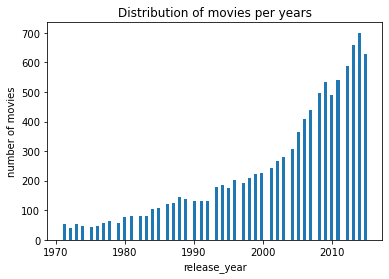

In [5]:
plt.hist(data = df_clean_movies, x = 'release_year' , bins = 100)
plt.xlabel('release_year')
plt.ylabel('number of movies')
plt.title('Distribution of movies per years')
plt.show()

## (Relationship between revenue and budget)

> There is strong linear relationship between budget and revenu..  
but there are some outliers on the two variables where there are  elements that has achieved very high profits not matched by a rise in the budget and there is also another element has been allocated a high budget and did not make revenue!

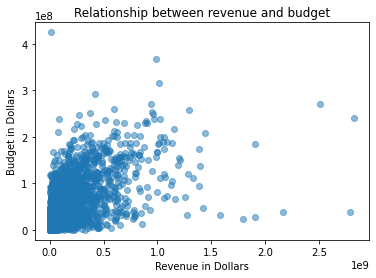

In [6]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(df_clean_movies['revenue_adj'], df_clean_movies['budget_adj'], alpha=0.5)
plt.show()

## (Exploring the 10 top movies that achieved  profit and their budget)
> i find the film "star wars" achieved the highst profit in this dataset but the buget in the normal range.

Text(0.5, 1.0, 'The Top 10 Movie profit with budget')

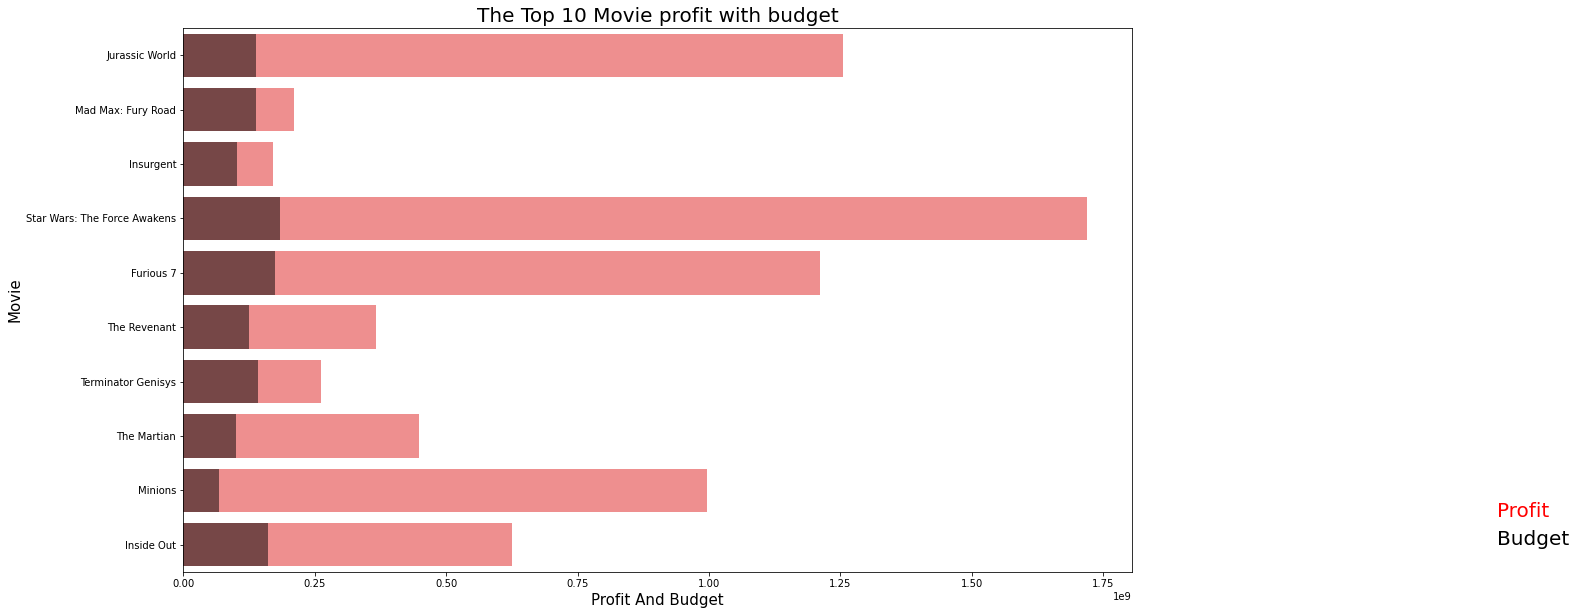

In [7]:
#plot the first 10 Movie profit with budget
plt.figure(figsize = (17,10))
sb.barplot(x = "profit",y= "original_title", data=  df_clean_movies.head(10),color="red",alpha=0.5,Label="Profit")   
sb.barplot(x = "budget_adj", y = "original_title",data= df_clean_movies.head(10),color= "black", alpha=0.5,label ="Budget")


plt.text(2500000000,8.5,"Profit",color="red",fontsize = 20 )
plt.text(2500000000,9,"Budget", color="black",  fontsize = 20 )
plt.xlabel("Profit And Budget",fontsize= 15)
plt.ylabel("Movie",fontsize= 15)
plt.title("The Top 10 Movie profit with budget",fontsize = 20)

## (Exploring the relationship between the avarge vote with profit and bugdet)
> i see the most of green area that repersent values  6 to 8  with the movies that achieve high profit.. there are un normal data that has voting with films that achieve low profit with too much budget.

Text(0.5, 1.0, 'The relationship between profit and budget with the voting ')

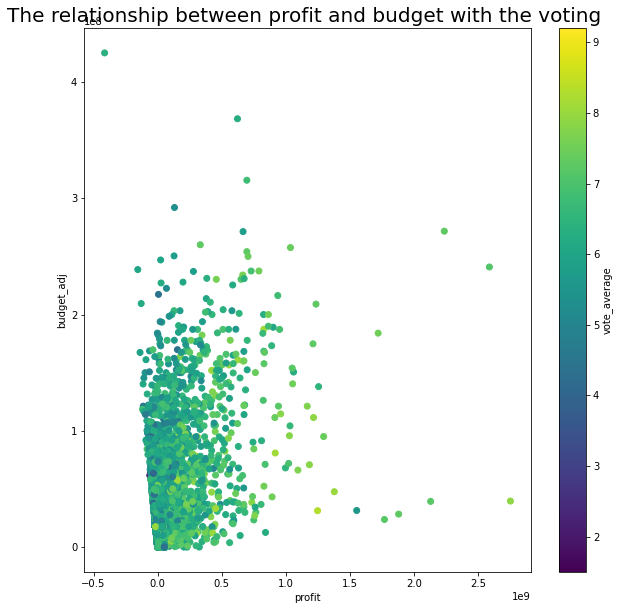

In [8]:
plt.figure(figsize = [10,10])
plt.scatter(data = df_clean_movies, x = 'profit', y = 'budget_adj',
                c = 'vote_average')
plt.colorbar(label = 'vote_average')
plt.xlabel('profit')
plt.ylabel('budget_adj')
plt.title("The relationship between profit and budget with the voting ",fontsize = 20)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert project3_slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!